# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

## Input data

In [3]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [4]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [5]:
# output dir for this notebook
RESULTS_DIR = Path(conf.RESULTS["DATA_TRANSFORMATIONS_DIR"], "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap')

## UMAP options

In [6]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [7]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [8]:
data = pd.read_pickle(INPUT_FILEPATH)

In [9]:
display(data.shape)

(3749, 987)

In [10]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [11]:
from data.dimreduction import get_umap_proj

In [12]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3749, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,-7.516746,0.300875,10.172270,7.235293,15.081844
std,1.363649,0.831780,0.741798,0.623588,0.847875
min,-9.142575,-1.305105,4.354950,4.881416,8.001960
25%,-8.157810,-0.184725,9.737357,6.821357,14.783074
50%,-7.768608,0.214808,10.234052,7.254055,15.119847
75%,-7.265254,0.700175,10.661971,7.699661,15.519849
max,2.960578,11.088941,12.534808,8.778034,17.483521


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3749, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,11.667530,-1.281877,2.741475,0.252802,-5.194531
std,0.614635,0.762489,0.568064,0.743449,0.764147
min,7.151138,-2.593357,-1.505797,-1.037291,-6.816354
25%,11.439322,-1.634749,2.505892,-0.165383,-5.532526
50%,11.658796,-1.375485,2.809999,0.106383,-5.295153
75%,11.967888,-1.054193,3.067614,0.456244,-5.033541
max,13.895837,11.346296,4.522652,4.658851,1.287042


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3749, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,11.568976,7.355754,11.267879,5.112085,16.240360
std,0.532828,0.497575,0.332682,0.311138,0.839745
min,7.561148,-0.423349,7.288350,3.934043,7.932266
25%,11.416198,7.148762,11.126831,4.921436,16.164885
50%,11.598224,7.329553,11.287426,5.126296,16.375513
75%,11.805898,7.534088,11.422673,5.329064,16.538406
max,12.704876,9.409404,12.178100,6.089090,17.439648


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3749, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,12.048045,9.776567,10.619061,5.579163,15.304787
std,0.707637,0.486287,0.330640,0.215690,0.871587
min,6.047788,0.533798,6.591578,4.676175,8.104358
25%,11.976559,9.634285,10.497344,5.442010,15.276850
50%,12.174281,9.771852,10.648478,5.593583,15.470864
75%,12.314528,9.936595,10.788346,5.718888,15.630330
max,12.842635,10.839581,11.493337,6.152011,16.115988


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3749, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,12.064989,8.581733,11.597040,5.346490,14.489970
std,0.535111,0.503057,0.421009,0.202592,0.709418
min,7.550630,-1.373201,5.554543,4.843082,9.005580
25%,11.971493,8.467064,11.487862,5.200290,14.466892
50%,12.124852,8.586386,11.627160,5.335732,14.603366
75%,12.266528,8.703697,11.755375,5.486707,14.744328
max,12.861876,9.745922,12.426261,6.167309,15.281291


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3749, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,11.819470,10.514360,10.790124,5.806060,13.429363
std,0.591982,0.462244,0.357213,0.170279,0.603651
min,6.864138,1.230025,5.346579,5.047084,7.840955
25%,11.726042,10.438283,10.718997,5.724452,13.357506
50%,11.911532,10.543786,10.828536,5.815688,13.531915
75%,12.061273,10.644863,10.921763,5.908139,13.656499
max,12.532558,11.035397,11.457878,6.249172,14.083682


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [13]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [14]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

[2021-01-12 00:40:19,454 - numexpr.utils] INFO: NumExpr defaulting to 4 threads.


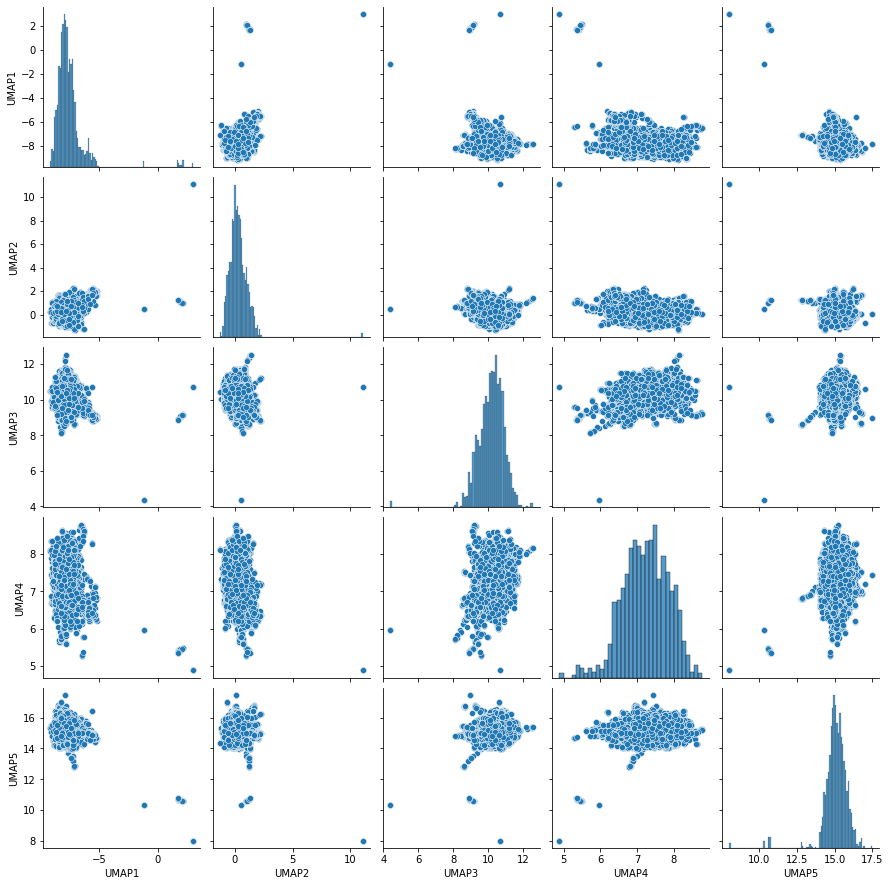

In [15]:
g = sns.pairplot(data=dr_data)

## Plot without "outliers"

In [16]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < -1)]

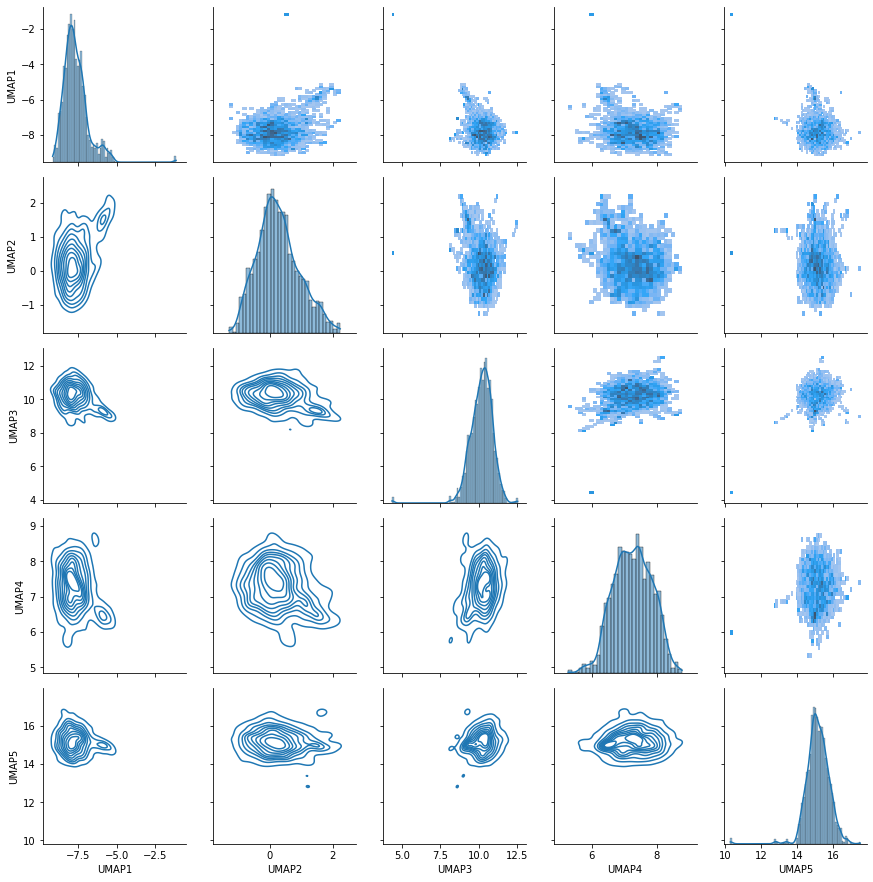

In [17]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)